<a href="https://colab.research.google.com/github/Calebmonroe/DS2/blob/main/HW5_regression_synthesis_nosols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework #5 - Synthesis of regression methods and Visualizations

In this assignment, you will bring to bear all of the methods (sampling, scaling, fitting, predicting, evaluating) used thus far to address several questions abot the automobile dataset introduced in class11, and the MNIST dataset introducted in class10.


## Package Imports
(I realize we keep importing packages that we don't use, which is not best practice, however my plan is to keep a running list of all the packages that we have used so that we have them all in one place at the end of the semester.)

##Imports and Function Definitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import sklearn.metrics as metrics
import seaborn as sns
import cv2
sns.axes_style("whitegrid")
sns.set_context("paper")
from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

#np.random.seed(42)

In [2]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)

In [3]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
#    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    print('mean_absolute_error: ', round(mean_absolute_error,4))
#    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [4]:
def model_acc_t(res):

    m1 = res['pred']; m2 = res['actual']
    sum12 = sum(m1==m2)
    pct=sum12/len(res)*100

    print("Your model made ", pct, "percent correct predictions\n")
    return
#X_train[0]

In [5]:
#model_acc2(res_df,type) # 0 for setosa, 1 for versi, 2 for virg

# need condition for each type
def model_acc2(res,type):

    if (type==0):
      m1 = res['pred']>=0.5
      m2 = res['actual']==1
    elif (type==1):
      m1 = res['pred']>=0.5
      m2 = res['actual']==1
    elif (type==2):
      m1 = res['pred']>=0.5
      m2 = res['actual']==1


#    m1 = res['pred']>=0.5
#    m2 = res['actual']==1
    sum12=sum(m1==m2)
    pct=sum12/len(res)*100
    print("Your model made ", pct, "percent correct predictions\n")
    return

In [6]:
def model_parm_std_err(xdata, ydata, model): # assumes xtest and ytest are not dfs
# this function was written for univariate regression,
# not yet tested for multivariate

# if you just want to check whether this algorithm works, use statsmodels

# using this with scaled data (both x and y) gives the same slope
# but a different intercept

    df_xt = pd.DataFrame(xdata)
    df_yt = pd.DataFrame(ydata)

    modelf = model

    N = len(df_xt)
    p = len(df_xt.columns) + 1  # plus one because LinearRegression adds an intercept term

    X_with_intercept = np.empty(shape=(N, p), dtype=float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = xdata


    beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ ydata

    #print(beta_hat)

    modelf.fit(xdata,ydata)

    slope = modelf.coef_[0][0]
    intercept = modelf.intercept_[0]

    y_hat = modelf.predict(df_xt)
    residuals = ydata - y_hat

    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat


# var_beta hat output errors on intercept first, then slope1, slope2, etc.
    for p_ in range(p):
      standard_error = var_beta_hat[p_, p_] ** 0.5
#      print(var_beta_hat.shape)
#      print(f"SE(beta_hat[{p_}]): {standard_error}")

    print ("slope:\t", slope, "+/-", var_beta_hat[1,1]**0.5, "\nintercept:\t", intercept, "+/-", var_beta_hat[0,0]**0.5)


In [7]:
def lasso_model_parm_std_err(xdata, ydata, model): # assumes xtest and ytest are not dfs
# this function was written for univariate regression for the lasso model which
# is formatted differently

# if you just want to check whether this algorithm works, use statsmodels

# using this with scaled data (both x and y) gives the same slope
# but a different intercept

    df_xt = pd.DataFrame(xdata)
    df_yt = pd.DataFrame(ydata)

    modelf = model

    N = len(df_xt)
    p = len(df_xt.columns) + 1  # plus one because LinearRegression adds an intercept term

    X_with_intercept = np.empty(shape=(N, p), dtype=float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = xdata


    beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ ydata

    #print(beta_hat)

    modelf.fit(xdata,ydata)

# format for lasso
    slope = modelf.coef_[0]
    intercept = modelf.intercept_[0]


    y_hat = modelf.predict(df_xt)
    residuals = ydata - y_hat

    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat


# var_beta hat output errors on intercept first, then slope1, slope2, etc.
    for p_ in range(p):
      standard_error = var_beta_hat[p_, p_] ** 0.5
#      print(var_beta_hat.shape)
#      print(f"SE(beta_hat[{p_}]): {standard_error}")

    print ("slope:\t", slope, "+/-", var_beta_hat[1,1]**0.5, "\nintercept:\t", intercept, "+/-", var_beta_hat[0,0]**0.5)

In [8]:
def mv_model_parm_std_err(xdata, ydata, model): # assumes xdata and ydata are not dfs
# this function was written for multivariate regression for the lasso model which
# is formatted differently

    df_xt = pd.DataFrame(xdata)
    df_yt = pd.DataFrame(ydata)

    modelf = model

    N = len(df_xt)
    p = len(df_xt.columns) + 1  # plus one because LinearRegression adds an intercept term

    X_with_intercept = np.empty(shape=(N, p), dtype=float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = xdata

    beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ ydata

    #print(beta_hat)

    modelf.fit(xdata,ydata)

# format for lasso
    slope = []
    for i in range(len(modelf.coef_)):
      slope.append(modelf.coef_[i])

#    slope = modelf.coef_[0]
    intercept = modelf.intercept_[0]


    y_hat = modelf.predict(df_xt)
    residuals = ydata - y_hat

    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat


# var_beta hat output errors on intercept first, then slope1, slope2, etc.
    for p_ in range(p):
      standard_error = var_beta_hat[p_, p_] ** 0.5
#      print(var_beta_hat.shape)
#      print(f"SE(beta_hat[{p_}]): {standard_error}")

    for p_ in range(p):
      std_err = var_beta_hat[p_,p_]**0.5
      if(p_==0):
        print("intercept:\t",intercept,"+/-",std_err,"\n")
        continue
#          print("slope",p_,":\t",slope[p_],"+/-",std_err,"\n")
#      else:
      print("slope",p_,":\t",slope[p_-1],"+/-",std_err,"\n")

#    print ("slope:\t", slope, "+/-", var_beta_hat[1,1]**0.5, "\nintercept:\t", intercept, "+/-", var_beta_hat[0,0]**0.5)

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Setting up the data

### Retrieve and preparing auto_mpg data
* retrieves dataset
* replaces a few horsepowers that were missing (looked up on google), change datatype to int
* drops origin and model info



In [10]:
web_path = '' #if downloaded data to the current folder
web_path = 'http://public.gettysburg.edu/~rjohnson/ds325/' #if using data over web
auto_df = pd.read_csv(web_path+'auto_mpg.csv')
#auto_df.head()


In [11]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
auto_df[(auto_df['horsepower']=='?')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [14]:
# what about cylinders 5 and 3?
auto_df[(auto_df['cylinders']==5)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
274,20.3,5,131.0,103,2830,15.9,78,2,audi 5000
297,25.4,5,183.0,77,3530,20.1,79,2,mercedes benz 300d
327,36.4,5,121.0,67,2950,19.9,80,2,audi 5000s (diesel)


In [15]:
# there are 6 ? in the horsepower column, what models are they?
#the 71 ford pinto had 76 hp
#the 74 ford maverick had a 200 in^3 engine with 91 hp
#the 80 renault lecar delux had 55 hp
#the 80 ford mustang cobra had 132 hp
#the 81 renault 18i had 81 hp
#the 82 amc concord dl had 110 hp
# replace those values for horsepower and then convert column to int type

#auto_df['horsepower']=='?'
#auto_df[(auto_df['horsepower']=='?'),1]

#df2 = auto_df
auto_df.replace({'?': ['76','91','55','132','81','110']}, inplace=True)


In [16]:
auto_df['horsepower'][32], auto_df['horsepower'][126], auto_df['horsepower'][330], auto_df['horsepower'][336], auto_df['horsepower'][354], auto_df['horsepower'][374]

('76', '91', '55', '132', '81', '110')

In [17]:
auto_df = auto_df.astype({'horsepower': 'int64'})

In [18]:
auto_df.drop('origin', axis=1, inplace=True)
auto_df.drop('car name', axis=1, inplace=True)

In [19]:
auto_df.info()
#auto_df['horsepower'][1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [20]:
# just some options for changing the appearance of your seaborn pairplots

#sns.set(rc={'axes.facecolor':'slategrey', 'figure.facecolor':'slategrey', 'lines.markerfacecolor':'red'})
#sns.set(rc={'axes.facecolor':'mistyrose', 'figure.facecolor':'mistyrose'})
sns.set(rc={'axes.facecolor':'lightgrey',
            'figure.facecolor':'lightgrey',
#            'text.color': 'white',
            'axes.edgecolor': 'white',
            'text.color': '0.95',
            'xtick.color': 'black',
            'ytick.color': 'black'})
#sns.set_style("dark")
#sns.pairplot(auto_df)

In [21]:
#

# Exercise 1 - Visualizing the automobile mpg data

Create a visualization of the automobile data that shows how the target (mpg) depends on the other available features.

Which feature(s) appear(s) to be most strongly correlated with the mpg?  


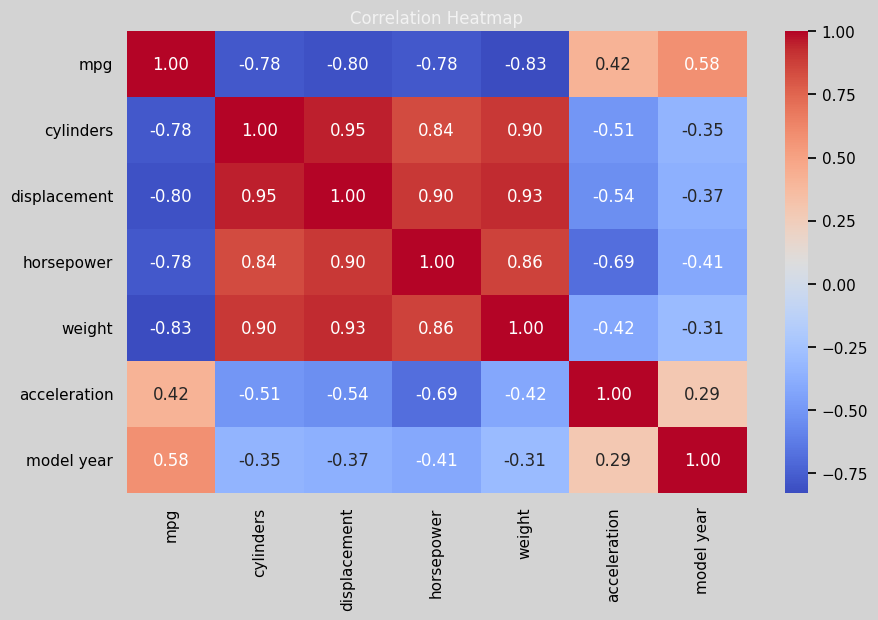

In [22]:
plt.figure(figsize=(10, 6)) # Creating heatmap to find which variables are most strongly correlated with mpg.
sns.heatmap(auto_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap') # Creating title
plt.show()

# The variables with the strongest correlations to mpg are weight and displacement. Although both of these variables are negatively correlated with mpg, their correlation values are closer to -1 than any of the other values for other variables are to -1 or 1. This implies the strongest level of correlation of mpg belongs to these two variables.

#Exercise 2 - Using automobile mpg data for multivariate lasso regression and parameter importance

Using a sample stratified according to model year, produce univariate and bivariate models of the two most important parameters for predicing the fuel efficiency (mpg).  Be sure to justify how you have determined the feature importance of the two you chose.

Be sure to:
* evaluate your model's accuracy on the training data (using cross_val_score(accuracy))
* evaluate your model's accuracy on the test set (using your model to make test predictions, then comparing those test predictions against the actual target test data)
* present your final discussion/comparison in a seprate Markdown cell at the end of your analysis

In [23]:
train_data, test_data = train_test_split(auto_df, test_size=0.2, stratify=auto_df['model year'])#train test split
# and making sure to stratify model year variable as well
X_train_weight = train_data['weight']
X_test_weight = test_data['weight']
X_train_weight = X_train_weight.values.reshape(-1, 1) #defining X, y and reshaping
X_test_weight = X_test_weight.values.reshape(-1, 1)
y_train = train_data['mpg']
y_test = test_data['mpg']
scaler = StandardScaler()#rescaling variables as some are drastically different than others
X_scaled = scaler.fit_transform(X_train_weight)
univariate_model1 = LinearRegression() #defining and fitting model
univariate_model1.fit(X_train_weight, y_train)
cross_val_model1 = -cross_val_score(univariate_model1, X_train_weight, y_train, scoring='neg_mean_squared_error', cv=10)
RMSE_model1 = (cross_val_model1.mean()) ** 0.5 #running cross validation on RMSE scores
print("Mean RMSE score", RMSE_model1)

Mean RMSE score 4.293885526053337


In [24]:
y_pred_model1 = univariate_model1.predict(X_test_weight) #finding RMSE score for test set
test_mse1 = mean_squared_error(y_test, y_pred_model1)
test_rmse1 = test_mse1 ** 0.5
test_rmse1

4.530719280439333

In [25]:
X_train_displacement = train_data['displacement']
X_test_displacement = test_data['displacement']
X_train_displacement = X_train_displacement.values.reshape(-1, 1) #defining X, y and reshaping
X_test_displacement = X_test_displacement.values.reshape(-1, 1)
y_train = train_data['mpg']
y_test = test_data['mpg']
scaler = StandardScaler()#rescaling variables as some are drastically different than others
X_scaled = scaler.fit_transform(X_train_weight)
univariate_model2 = LinearRegression() #defining and fitting model
univariate_model2.fit(X_train_weight, y_train)
cross_val_model2 = -cross_val_score(univariate_model2, X_train_weight, y_train, scoring='neg_mean_squared_error', cv=10)
RMSE_model2 = (cross_val_model2.mean()) ** 0.5 #running cross validation on RMSE scores
print("Mean RMSE score", RMSE_model2)

Mean RMSE score 4.293885526053337


In [26]:
y_pred_model2 = univariate_model2.predict(X_test_displacement) #finding RMSE score for test set
test_mse2 = mean_squared_error(y_test, y_pred_model2)
test_rmse2 = test_mse2 ** 0.5
test_rmse2

22.431641989115082

In [27]:
features = ['weight', 'displacement']
X_train_both = train_data[features]
X_test_both = test_data[features]
y_train = train_data['mpg']
y_test = test_data['mpg']
scaler = StandardScaler()#rescaling variables as some are drastically different than others
X_scaled = scaler.fit_transform(X_train_weight)
bivariate_model1 = LinearRegression() #defining and fitting model
bivariate_model1.fit(X_train_both, y_train)
cross_val_model3 = -cross_val_score(bivariate_model1, X_train_both, y_train, scoring='neg_mean_squared_error', cv=10)
RMSE_model3 = (cross_val_model3.mean()) ** 0.5 #running cross validation on RMSE scores
print("Mean RMSE score", RMSE_model3)

Mean RMSE score 4.258025519208373


In [28]:
y_pred_model3 = bivariate_model1.predict(X_test_both) #finding RMSE score for test set
test_mse3 = mean_squared_error(y_test, y_pred_model3)
test_rmse3 = test_mse3 ** 0.5
test_rmse3

4.492885018579815

# Results and Discussion
Considering linear regression is being used for these tests, I found it easier to use RMSE as the main metric for analysis. The first model on the training data for the variable "weight" produces a RMSE value of 4.34. The model's performance on the test set produced a slightly higher RMSE score of 4.356. For the second set of models, the X variable is changed to displacement. The RMSE score for the first test on the training set is 4.34. However, the RMSE for the model on the test set is significantly higher. The value is 22.5, which implies that the overall level of error in the model is significantly higher when compared to the actual target test data. This implies that the model's performance on the training data was significantly more accurate as the overall error was significantly less. Finally the bivariate model deals with both weight and displacement. The RMSE score for the model on the training set is 4.325 and 4.257 on the testing set. This implies that the model is slightly more accurate on the testing set than the training set. The most accurate model is definitely the bivariate model using both independent variables as both RMSE scores are less than the scores for the other models. NOTE: Every time that I re-run the code, there are different outputs for my RMSE scores. This may be due to the differences in train-test splits and/or cross validation scores as well. The values that I have discussed in this discussion were the final output values given before submitting the assignment.

#Mastery Level Question 1

Using your results from the previous exercise (where you used a stratified sampling according to model year), compare that model's predictive accuracy to one using the unstratified training and test sets.  Would you conclude that stratifying our sample with regard to model year improved its predictive ability or not?  

# Exercise 3 - Predicting the number of cylinders

How well can we predict the number of cylinders in an engine?  The number of possible cylinders are 3, 4, 5, 6, 8  which makes 5 possible target classes

Produce a multivariate softmax logistic regressor using all available features to predict the number of cylinders in a car's engine


Be sure to:
* evaluate your model's accuracy on the training data (using cross_val_score(accuracy))
* evaluate your model's accuracy on the test set (using your model to make test predictions, then comparing those test predictions against the actual target test data)
* present your final discussion/comparison in a seprate Markdown cell at the end of your analysis







In [29]:
X = auto_df[['displacement', 'acceleration', 'horsepower', 'weight', 'model year']]#defining X and y
y = auto_df[['cylinders']]
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #train test split
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000)
softmax_model.fit(X_train, y_train) #creating softmax model and fitting model
cv_scores = cross_val_score(softmax_model, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean() #finding mean cross validation score
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy) #printing mean cross validation score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mean Cross-Validation Accuracy: 0.955952380952381


In [30]:
from sklearn.metrics import accuracy_score
y_pred_bivariate = softmax_model.predict(X_test) #creating y_pred for bivariate
test_accuracy = accuracy_score(y_test, y_pred_bivariate) #calculating test_accuracy
print("Test Set Accuracy:", test_accuracy) #printing accuracy

Test Set Accuracy: 0.95


# Discussion
After running both logistic regression models, it can be concluded that the model's performance is slightly better on the test data set than the training data set. The accuracy score on the training set is .956 and the accuracy score on the testing data set is .95.

# Mastery Level Question 2
Produce univariate and bivariate logistic regressors using the two most important parameters you identified from exercise 2 and assess their accuracy relative to the multivariate model (from exercise 3) at predicing the # of cylinders

# Exercise 4: Clustering: working with reduced MNIST data

Use PCA to transform the MNIST data set into 3 reduced data sets, retaining 75%, 95%, and 99% variance.  For each of the reduced datasets, train a SGD classifier model to predict the digits in each image.  Discuss each model's accuracy, confusion matrix, precision, recall and F1 scores on both the training and test sets.

In [31]:
from keras.datasets import mnist#importing mnist data set
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
(X_train, y_train), (X_test, y_test) = mnist.load_data() #loading in new data set with X and y train / test
X_train_resized = np.resize(X_train, (60000, 784)) #resizing X train and X test
X_test_resized = np.resize(X_test, (10000, 784))
pca = PCA(n_components=0.75) #specifying variance for transformation
X_train_reduced = pca.fit_transform(X_train_resized) #transforming X_train reduced
SGD_classifier_75 = SGDClassifier(max_iter=10000, random_state=42) #defining SGD classifier
SGD_classifier_75.fit(X_train_reduced, y_train)
X_train_reduced.shape #printing shape

(60000, 34)

In [32]:
y_train_pred = SGD_classifier_75.predict(X_train_reduced)#creating y_pred in order to find metrics
accuracy_train = accuracy_score(y_train, y_train_pred)#finding metrics of train set on .75 variance set
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print("Training Accuracy:", accuracy_train) #printing metrics
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

Training Accuracy: 0.8615333333333334
Training Confusion Matrix:
 [[5806    5   15   10    6   21   28    4   24    4]
 [   3 6411   91   12   15   47    6   18  137    2]
 [ 132   48 5082  137   70   22  186   70  154   57]
 [  80   55  176 5157   23  262   56   90  146   86]
 [  89   36   30    1 5103   10  167   22  137  247]
 [ 265  126   76  324  187 3847  211   21  272   92]
 [  72   29   76    1   32  106 5542    1   55    4]
 [ 139   36  118   16  118   36   11 5565   26  200]
 [ 118  391   99  184  104  148   91   60 4591   65]
 [ 147   72   18  105  408  105   16  313  177 4588]]
Training Precision: 0.8611275515040279
Training Recall: 0.8615333333333334
Training F1 Score: 0.8598644291476936


In [33]:
pca = PCA(n_components=0.75) #specifying variance for transformation
X_test_reduced = pca.fit_transform(X_test_resized) #transforming X_train reduced
SGD_classifier_75 = SGDClassifier(max_iter=10000, random_state=42) #defining SGD classifier
SGD_classifier_75.fit(X_test_reduced, y_test)
X_test_reduced.shape #printing shape
y_test_pred = SGD_classifier_75.predict(X_test_reduced)#creating y_pred in order to find metrics
test_accuracy = accuracy_score(y_test, y_test_pred)#finding metrics of test set on .75 variance set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("\nTest Accuracy:", test_accuracy)#printing metrics
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)


Test Accuracy: 0.7841
Test Confusion Matrix:
 [[ 919    8    1    3    8   21   10    1    5    4]
 [   2 1000   58   24    0    2    2    2   45    0]
 [  12    6  849   23   34   10   12   27   55    4]
 [  28   10   47  814    5   50    4   15   28    9]
 [   5   13    1   28  867    6   13   19   14   16]
 [  98    7    6  105   38  553    8   23   36   18]
 [  64    3   16    4   25   16  795    7   21    7]
 [  24   10   39   14   13    2    3  914    2    7]
 [  16   16   17   39   34  123   16   26  681    6]
 [  15   13    6   80  220   19   68  120   19  449]]
Test Precision: 0.7908945206143118
Test Recall: 0.7841
Test F1 Score: 0.7780604680520181


In [34]:
pca = PCA(n_components=0.95) #specifying variance for transformation
X_train_reduced = pca.fit_transform(X_train_resized)#transforming X_train reduced
SGD_classifier_95 = SGDClassifier(max_iter=10000, random_state=42) #defining SGD classifier
SGD_classifier_95.fit(X_train_reduced, y_train)
X_train_reduced.shape #printing shape

(60000, 154)

In [35]:
y_train_pred = SGD_classifier_95.predict(X_train_reduced)#creating y_pred in order to find metrics
accuracy_train = accuracy_score(y_train, y_train_pred)#finding metrics of train set on .95 variance set
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print("Training Accuracy:", accuracy_train)#printing metrics
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

Training Accuracy: 0.8929
Training Confusion Matrix:
 [[5659    2   47   14   20   44   65   25   19   28]
 [   3 6492   45   20    6   52   10    8   94   12]
 [  27   43 5305   55   96   39  126   78  158   31]
 [  46   55  224 5283    8  176   62   69  121   87]
 [   5   36   25   20 5285   13   79   47   68  264]
 [ 120   28   72  203   87 4428  137   67  178  101]
 [  35   15   27    0   29  133 5638   10   30    1]
 [  16   31   86   53   57   13    7 5733   49  220]
 [  86  125  133  155   23  157   79   50 4820  223]
 [  20   74   37  107  226   66    5  387   96 4931]]
Training Precision: 0.8923368380189388
Training Recall: 0.8929
Training F1 Score: 0.8923963737737084


In [36]:
pca = PCA(n_components=0.95) #specifying variance for transformation
X_test_reduced = pca.fit_transform(X_test_resized) #transforming X_train reduced
SGD_classifier_95 = SGDClassifier(max_iter=10000, random_state=42) #defining SGD classifier
SGD_classifier_95.fit(X_test_reduced, y_test)
X_test_reduced.shape #printing shape
y_test_pred = SGD_classifier_95.predict(X_test_reduced)#creating y_pred in order to find metrics
test_accuracy = accuracy_score(y_test, y_test_pred)#finding metrics of test set on .95 variance set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("\nTest Accuracy:", test_accuracy)#printing metrics
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)


Test Accuracy: 0.7813
Test Confusion Matrix:
 [[ 873    0   10   37    1    5   41    8    2    3]
 [   2 1044    3    1    2    2    6    0   69    6]
 [  21   30  854   15   14    1   20   13   55    9]
 [  14   13   51  825    5   26    4    6   51   15]
 [   6    6   10   15  800   54   26    9   36   20]
 [  40   10   14   85   12  632   22   10   49   18]
 [  27   11   38    6   12   16  802   10   20   16]
 [  29   21   40    3   43   13   14  765   58   42]
 [  19   16   12   66   18   57   11    5  761    9]
 [  40    7   15   17  120  112   14   42  185  457]]
Test Precision: 0.7879332321340489
Test Recall: 0.7813
Test F1 Score: 0.7783452964184697


In [37]:
pca = PCA(n_components=0.99) #specifying variance for transformation
X_train_reduced = pca.fit_transform(X_train_resized)#transforming X_train reduced
SGD_classifier_99 = SGDClassifier(max_iter=10000, random_state=42) #defining SGD classifier
SGD_classifier_99.fit(X_train_reduced, y_train)
X_train_reduced.shape #printing shape

(60000, 331)

In [38]:
y_train_pred = SGD_classifier_99.predict(X_train_reduced)#creating y_pred in order to find metrics
accuracy_train = accuracy_score(y_train, y_train_pred) #finding metrics of train set on .99 variance set
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print("Training Accuracy:", accuracy_train)#printing metrics
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

Training Accuracy: 0.8987166666666667
Training Confusion Matrix:
 [[5772    1   38    4    4   13   40    5   34   12]
 [   1 6497   85   15    7   12    5   14   97    9]
 [  50   60 5204  147   68    9   95   82  208   35]
 [  35   39  257 5332    4  108   40   53  163  100]
 [  35   34   83    6 5456    9   22   19   40  138]
 [  96   27   94  252   35 4424  178   39  195   81]
 [  41   11  106    1   24   89 5614    3   28    1]
 [  28   15   61   41  116    6    6 5598   24  370]
 [  63  105  275  179   19   92   69   35 4803  211]
 [  32   40   28   59  289   46    3  170   59 5223]]
Training Precision: 0.8990580599786655
Training Recall: 0.8987166666666667
Training F1 Score: 0.8983890226207553


In [39]:
pca = PCA(n_components=0.99) #specifying variance for transformation
X_test_reduced = pca.fit_transform(X_test_resized) #transforming X_train reduced
SGD_classifier_99 = SGDClassifier(max_iter=10000, random_state=42) #defining SGD classifier
SGD_classifier_99.fit(X_test_reduced, y_test)
X_test_reduced.shape #printing shape
y_test_pred = SGD_classifier_99.predict(X_test_reduced) #creating y_pred in order to find metrics
test_accuracy = accuracy_score(y_test, y_test_pred)#finding metrics of test set on .99 variance set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("\nTest Accuracy:", test_accuracy)#printing metrics
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)


Test Accuracy: 0.8196
Test Confusion Matrix:
 [[ 907    0    0    5    1   42    6    5   14    0]
 [   3 1042    9    2   49    1    7    0   18    4]
 [  33    9  805   35   18    5    8   13   98    8]
 [  21   23   31  781   12   37   15   27   35   28]
 [   6   12    7    3  869    5    4   22    5   49]
 [  37   24   25   46   33  647   15   17   37   11]
 [  64   12   34   17   16   27  753   17   15    3]
 [   4   12   19   10   17    1    5  893    7   60]
 [  17   17    7   83   36   46   20    4  710   34]
 [  23    9    4   22   35   14    9   91   13  789]]
Test Precision: 0.8204097239589347
Test Recall: 0.8196
Test F1 Score: 0.8187204958938228


# Discussion
In general, the models all performed better on the training data sets rather than the testing data sets. In specific, the best performing models were the ones working with the training sets from the PCA reduced 95 and 99 percent varaince data sets. This is because the accuracy, precision, recall, and F1 scores for both of the models are all very close to 89. This value of 89 is a higher value than the results from the other 4 model results, meaning that these two models performed the best and are the most reliable.

# Mastery Level Question 3
Explore the tSNE and UMAP dimensional reduction algorithms.  Run the resulting reduced datasets through and assess their ability to predict the training and test data using (at most) their first 3 components